In [6]:
from reservoir_rls import *
import matplotlib.pyplot as plt
from lorenz63 import *
from scipy.signal import welch, periodogram
from tqdm import tqdm

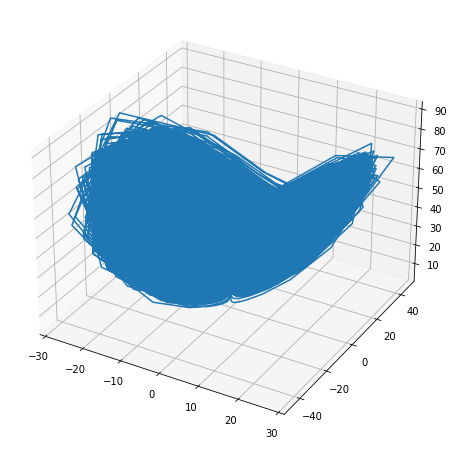

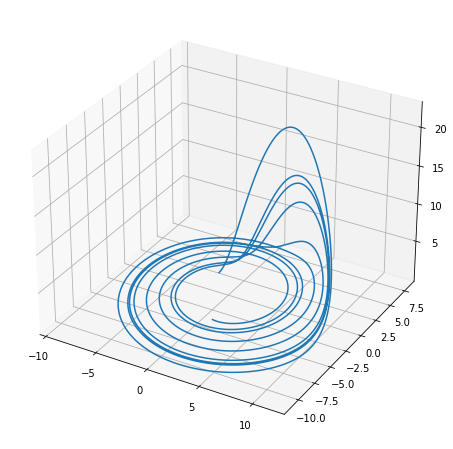

In [7]:
data_length = 500000
step = 0.05
f_s = 1/step
scale = 0.01
slow_var = 2
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz_rossler(x, time, r_t, scale = scale, slow_var = slow_var)
lorenz_data_rossler = getCoupledLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_rossler[:,0],lorenz_data_rossler[:,1],lorenz_data_rossler[:,2])
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_rossler[:,3],lorenz_data_rossler[:,4],lorenz_data_rossler[:,5])
plt.show()

In [8]:
num_nodes = 300
num_tests = 100
train_length = 1000
sync_length = 500
pred_length = 500
res_seed = 1
leakage = 0.2
spectral_radius = 0.6
input_weights = np.linspace(-0.25,0.25,11)
input_biases  = np.linspace(-0.25,0.25,11)
regularizations = np.logspace(-11,-5,7)
forgets = np.array([1,0.999,0.995,0.99,0.985,0.98])

vts = np.zeros((input_weights.size,input_biases.size,regularizations.size,forgets.size))
with tqdm(total = vts.size) as pbar:
    for i, weight in enumerate(input_weights):
        for j, bias in enumerate(input_biases):
            for k, regularization in enumerate(regularizations):
                for m, forget in enumerate(forgets):
                    res1 = reservoir(3,num_nodes, input_weight = weight, input_bias = bias, \
                        leakage = leakage, spectral_radius = spectral_radius, regularization = regularization, \
                        forget = forget, seed = res_seed)
                    results = cross_validation_performance_resync(lorenz_data_rossler[:,:3], res1, \
                        num_tests, sync_length, train_length, pred_length, \
                        seed = 20, errormax = 3.2, train_method = 'Normal', progress = False, plot = False)
                    vts[i,j,k,m] = np.mean(results)
                    pbar.update(1)

 31%|███████████████████████                                                   | 1583/5082 [2:40:51<5:55:34,  6.10s/it]


KeyboardInterrupt: 